# PGP Web of Trust visualization

In [16]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from math import log
import random, logging, sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

logger = logging.getLogger('main')
logging.basicConfig(level=logging.INFO, stream=sys.stderr)
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["font.size"] = 30

In [17]:
G = nx.read_graphml('data/wot_default.graphml')
logger.info("nodes: %s", G.number_of_nodes())
logger.info("edges: %s", G.number_of_edges())

INFO:main:nodes: 48983
INFO:main:edges: 183840


In [ ]:
# average shortest path length = 6.598257086979384

## Degree rank

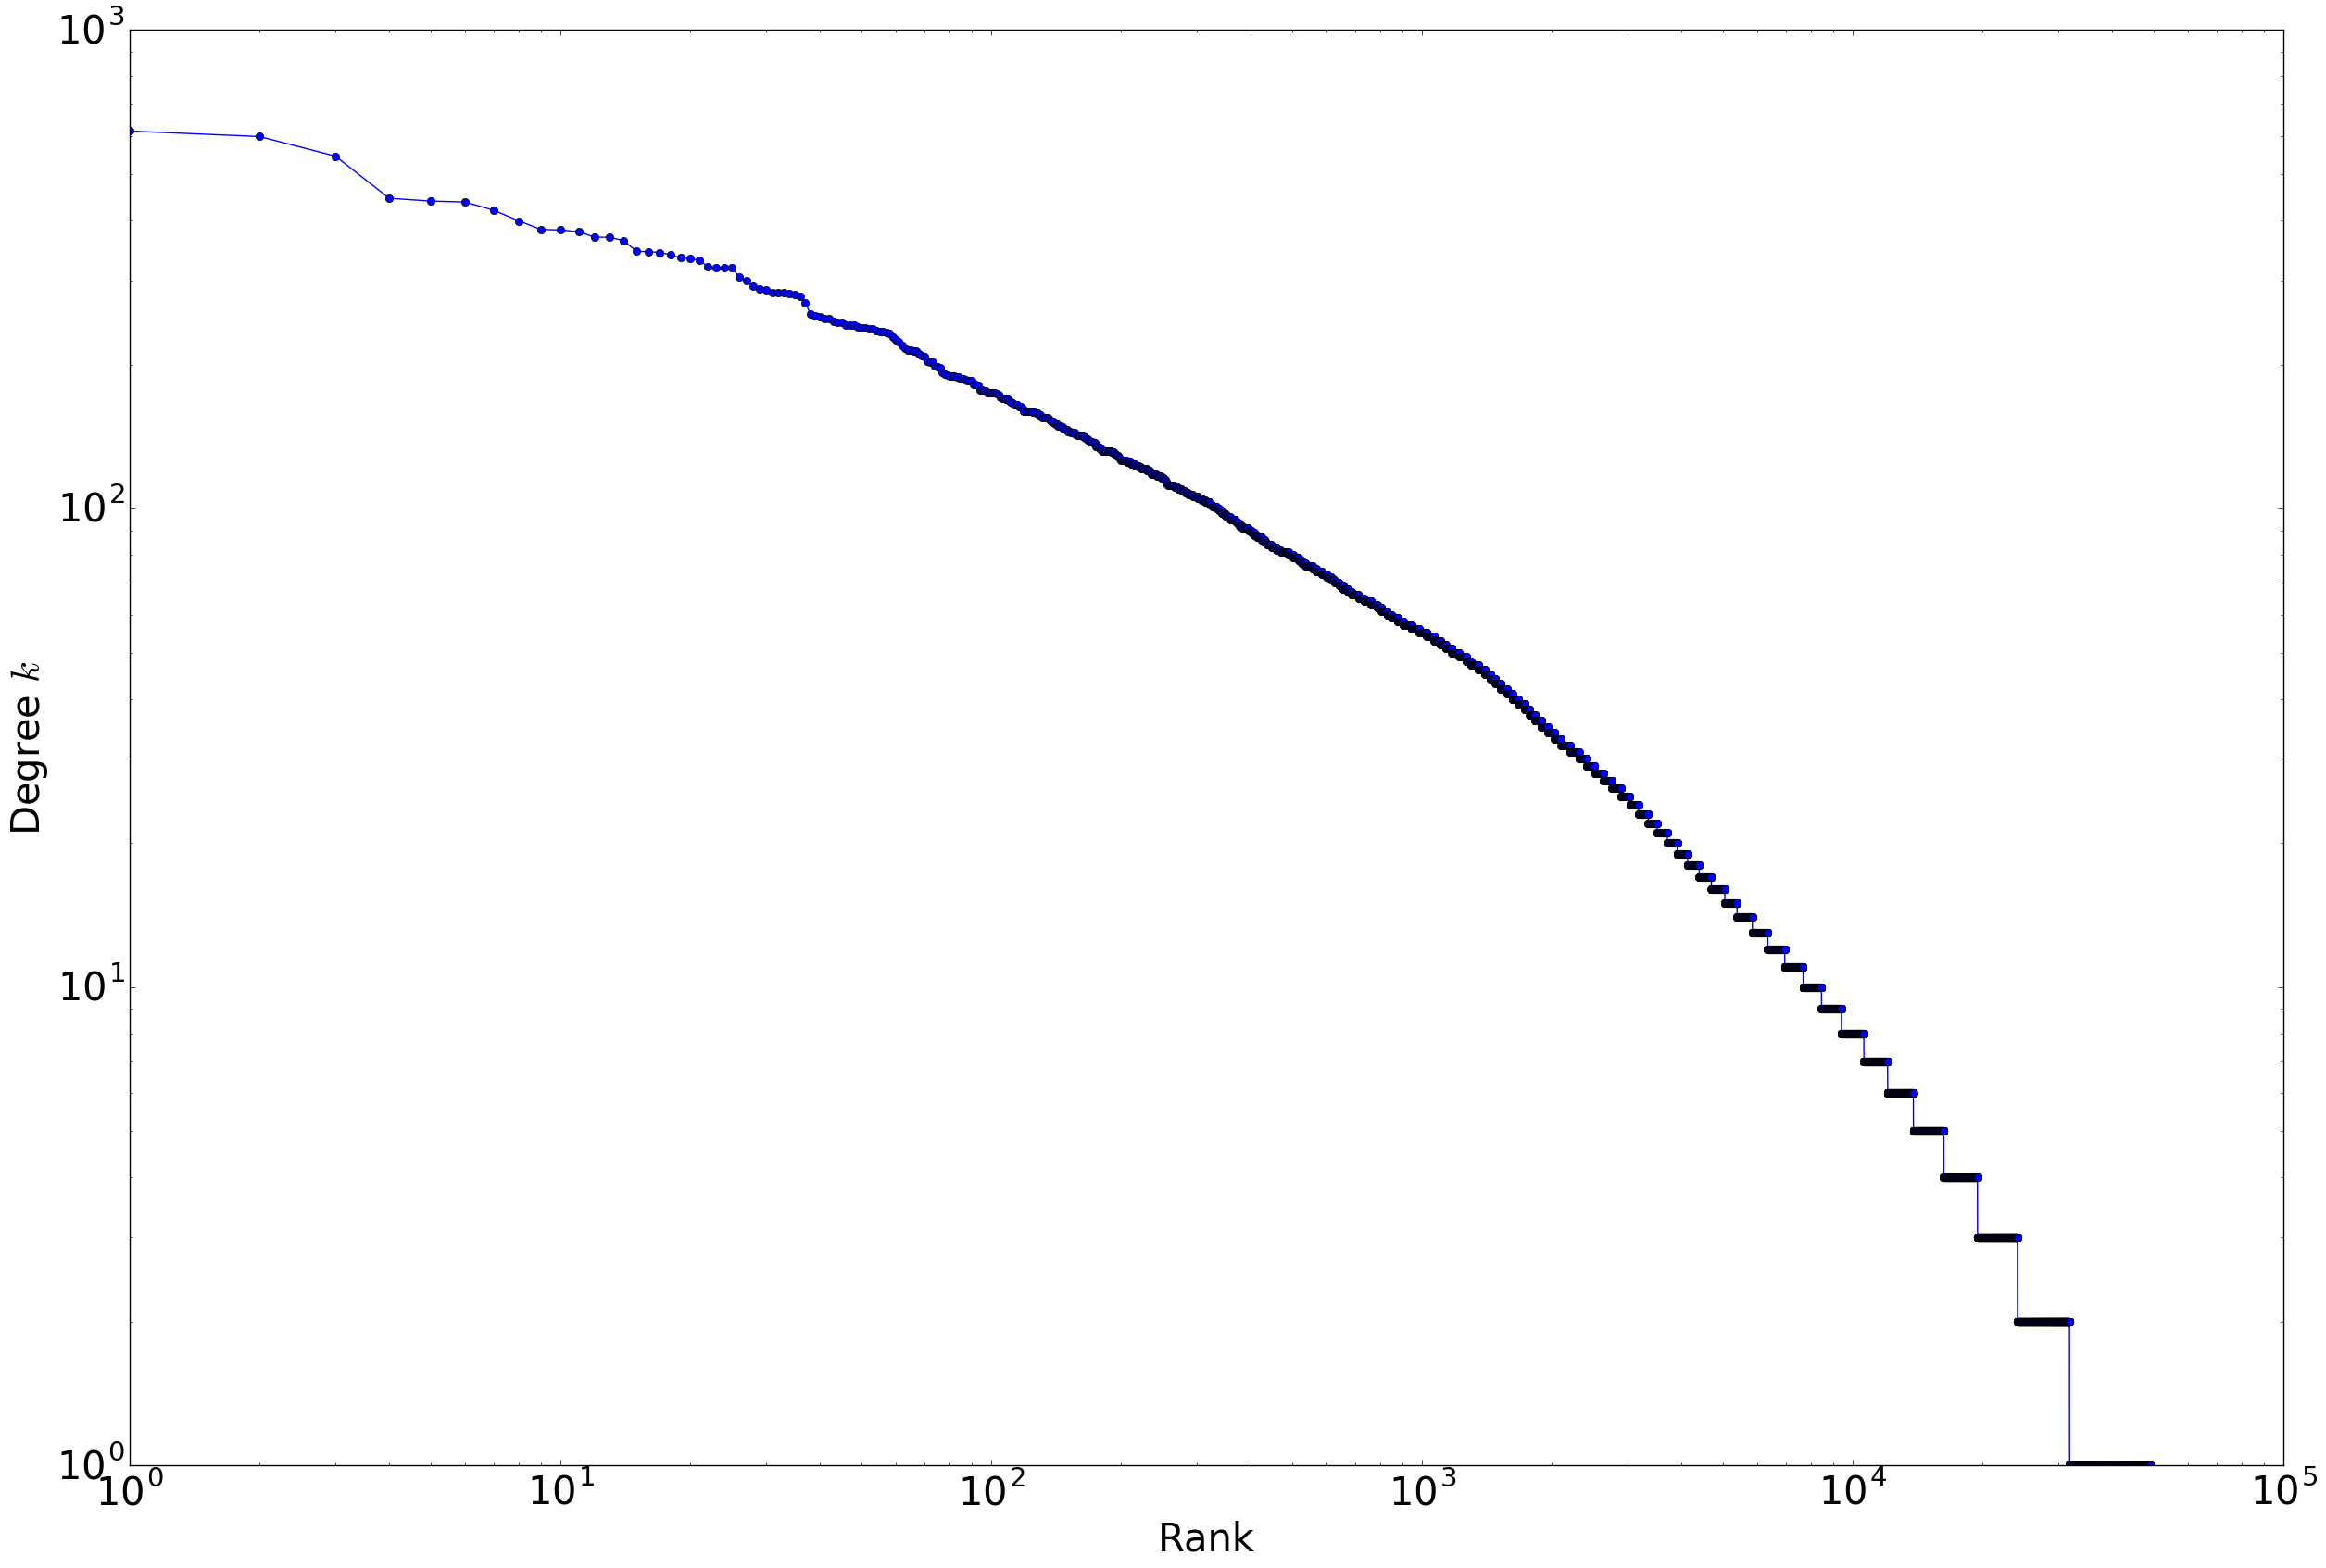

In [18]:
# degree rank
degree_sequence=sorted(nx.degree(G).values(),reverse=True)
plt.loglog(degree_sequence,'b-',marker='o')
#plt.title("Degree rank plot")
plt.ylabel("Degree $k$")
plt.xlabel("Rank")
plt.show()

## Degree distribution (loglog)

In [19]:
degree_sequence=sorted(nx.degree(G).values())
hist={} # {degree k: number of v with deg k}
for d in degree_sequence:
    if d in hist:
        hist[d]+=1
    else:
        hist[d]=1

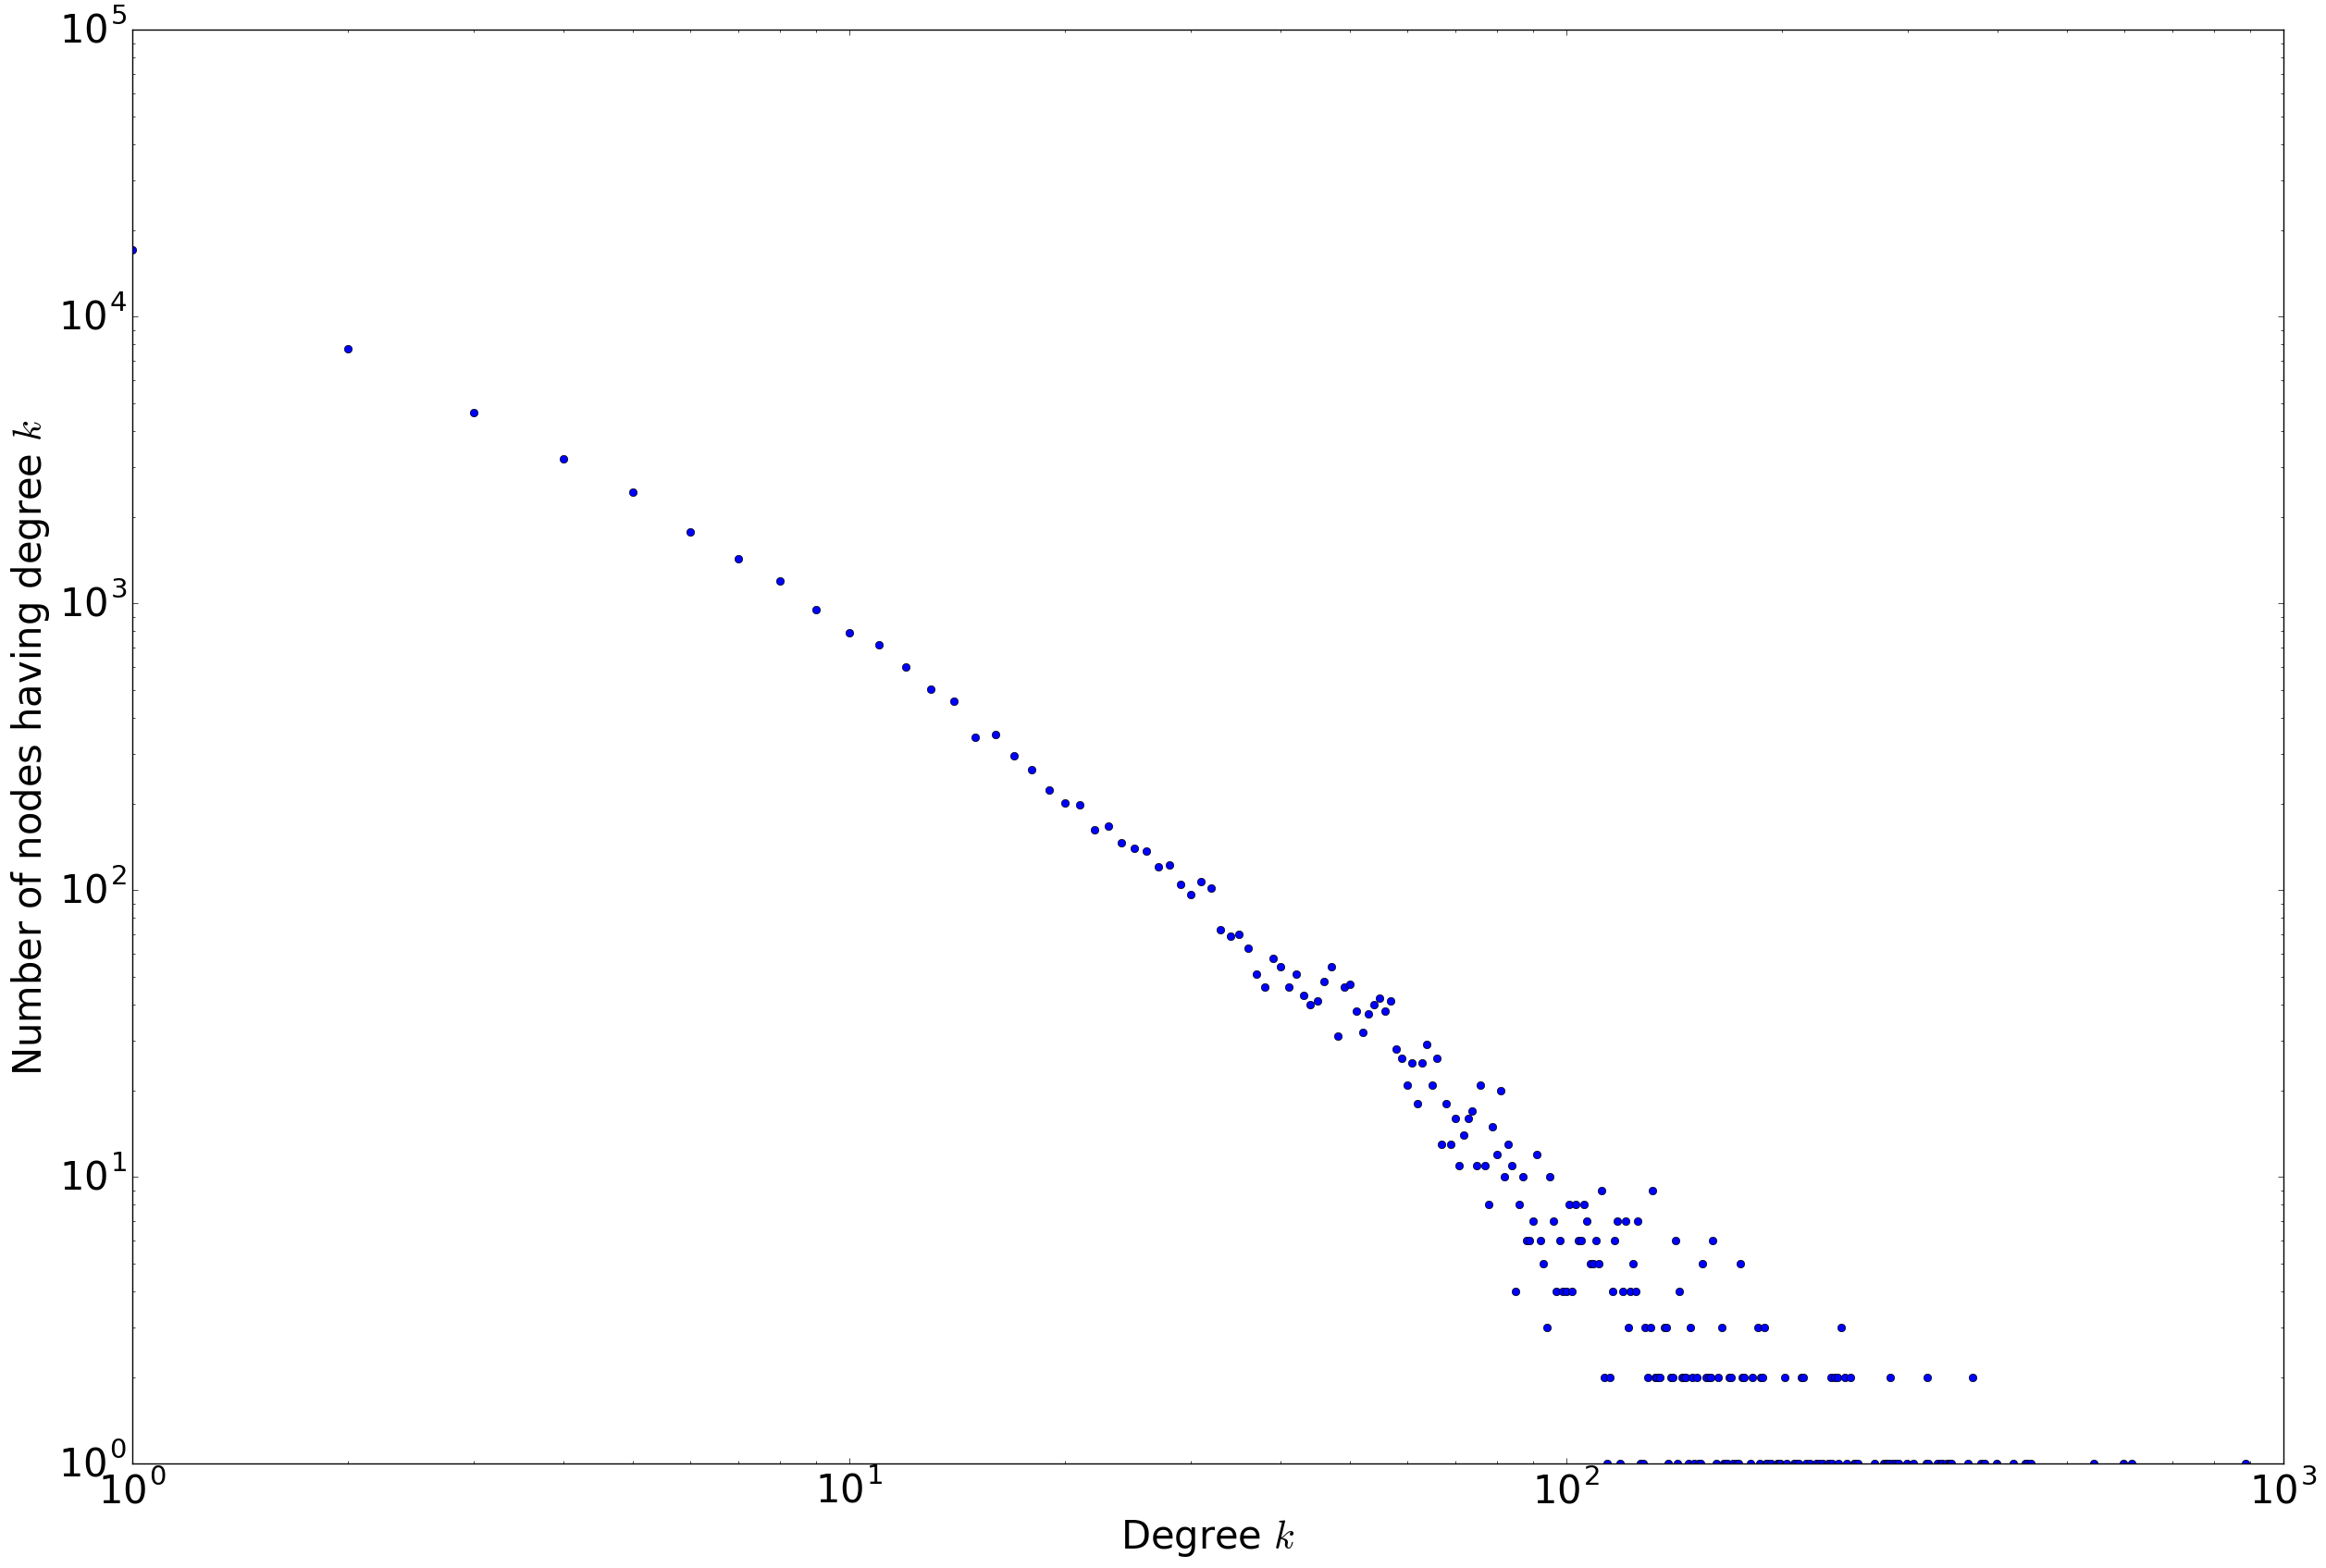

In [4]:
# degree dist
plt.loglog(list(hist.keys()), list(hist.values()),'bo')
#plt.title("Degree distribution")
plt.ylabel("Number of nodes having degree $k$")
plt.xlabel("Degree $k$")
#plt.savefig('fig/wot_degree_distribution.eps')
plt.show()

## Degree distribution (semilogx)

In [5]:
size = G.number_of_nodes()
hist_frac = {}
for d in hist.keys():
    hist_frac[d] = hist[d] / size

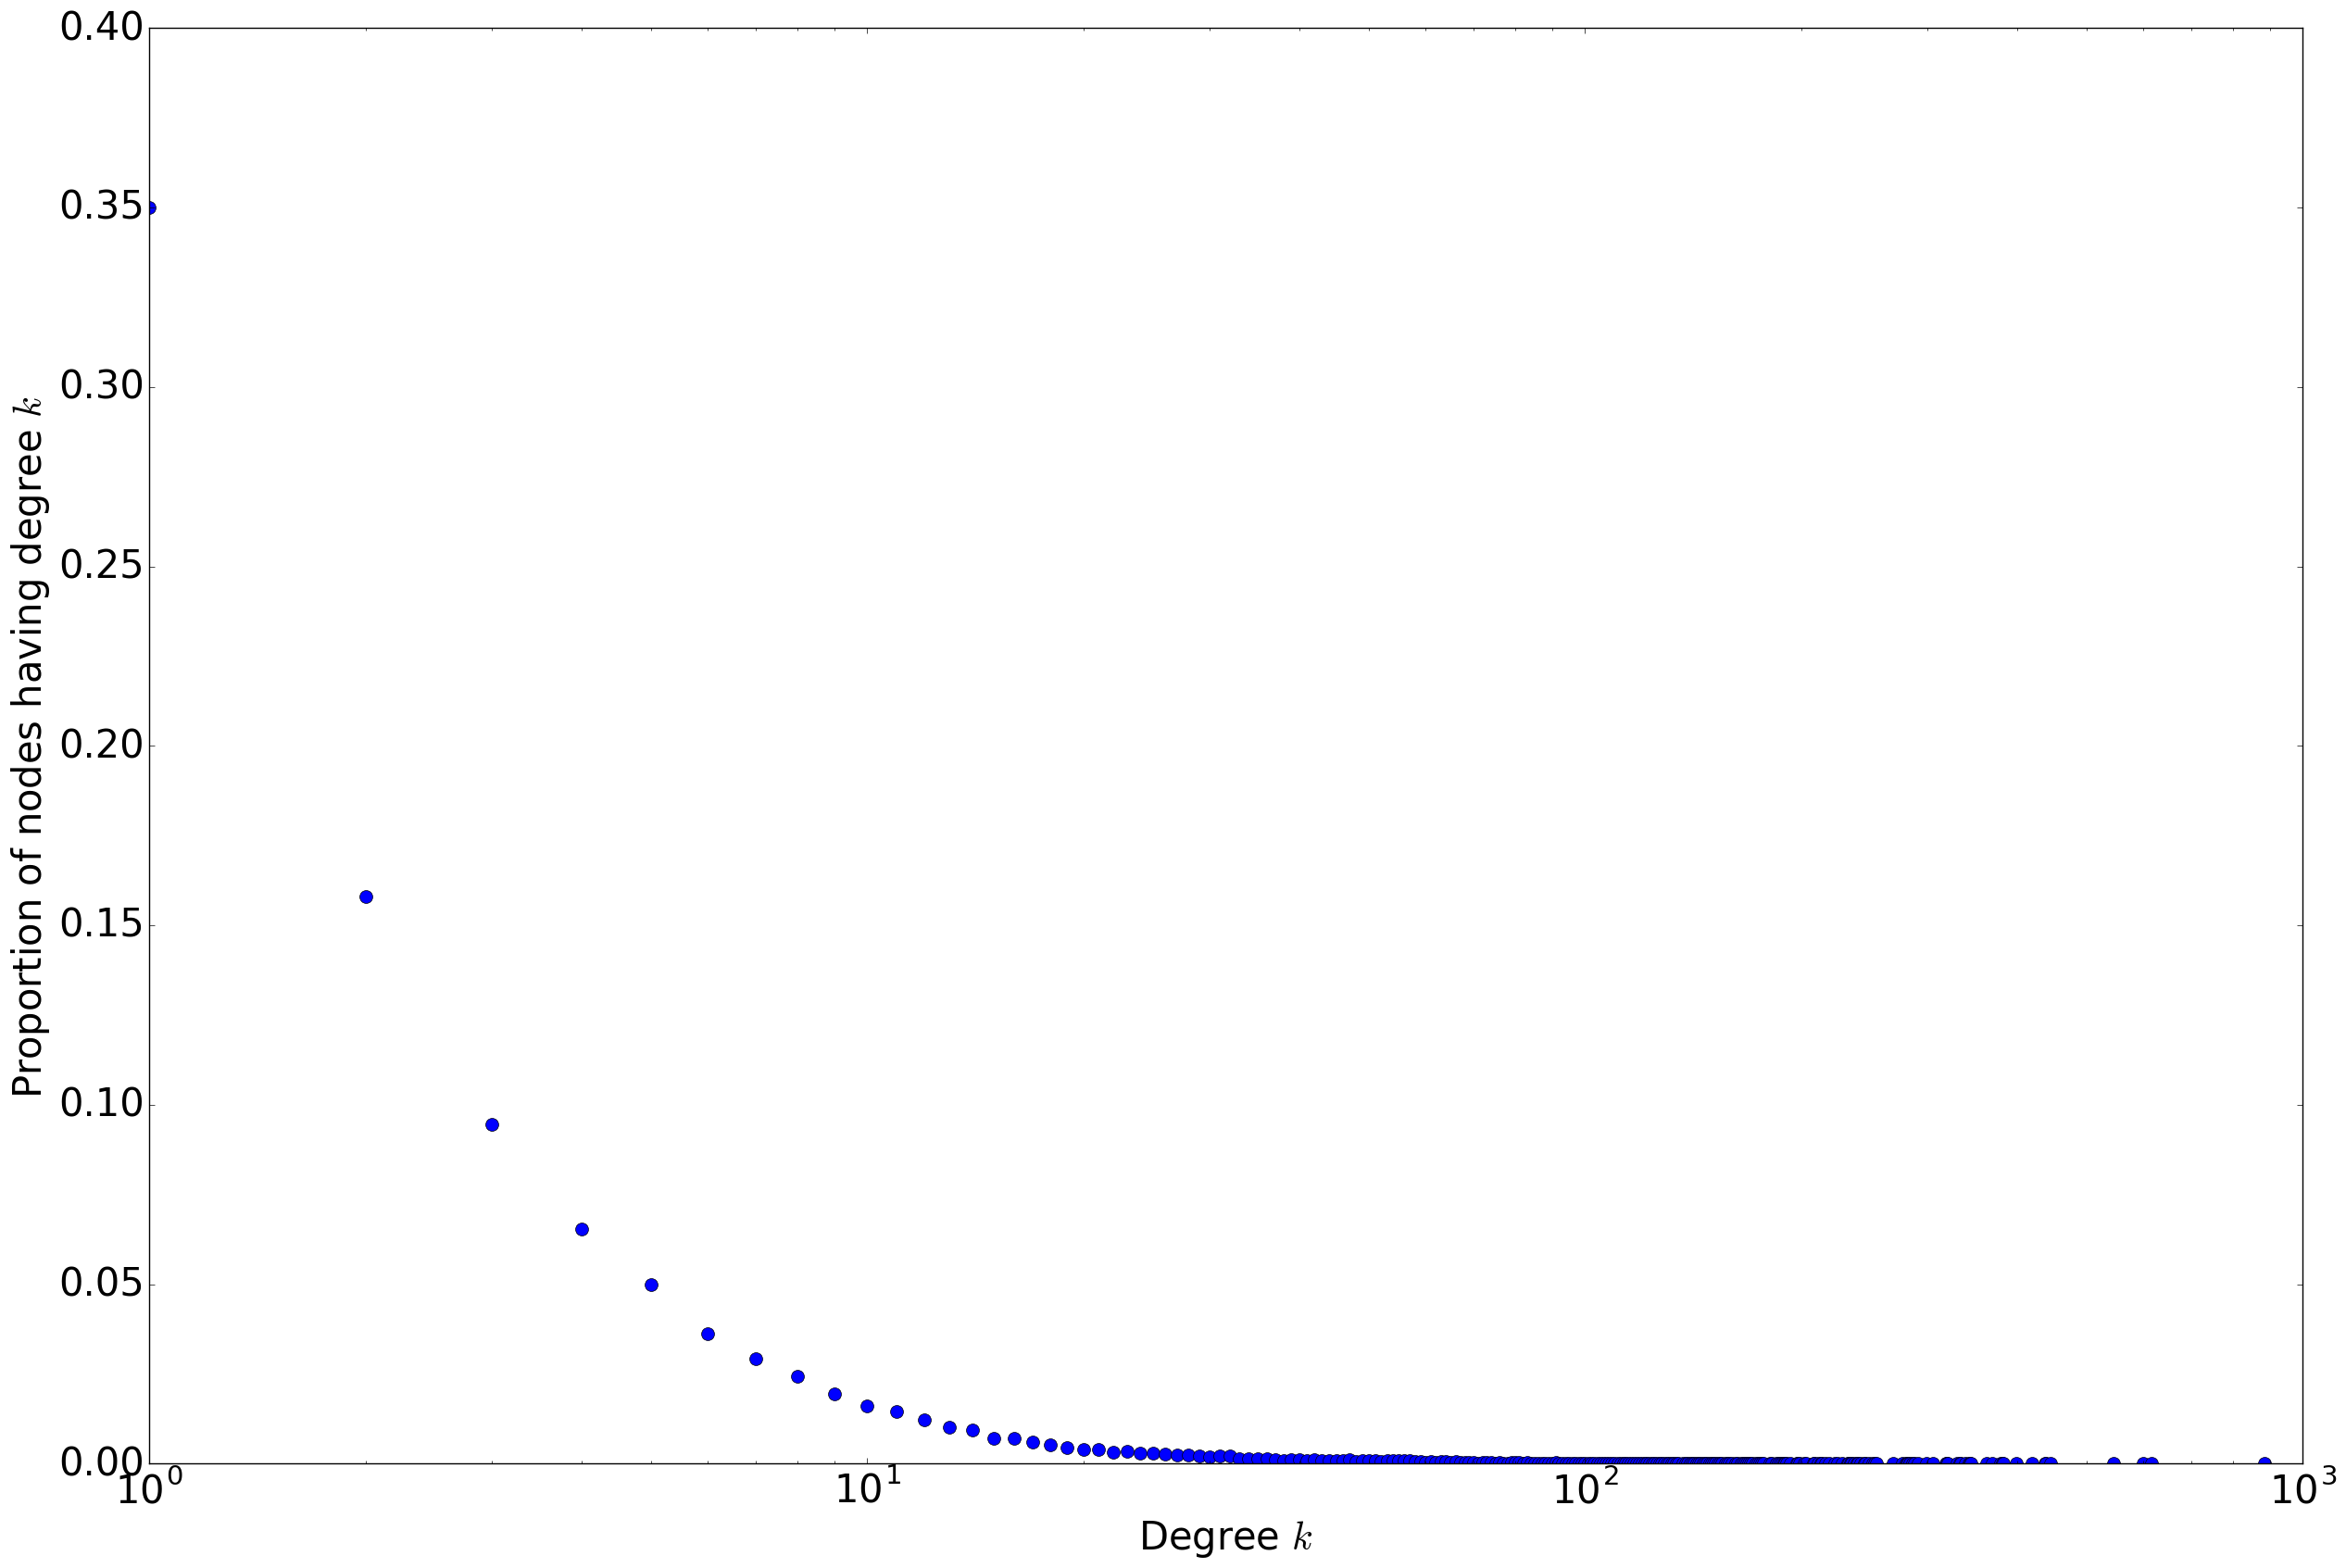

In [7]:
plt.semilogx(list(hist_frac.keys()), list(hist_frac.values()),'bo', markersize=10)
#plt.title("Degree distribution")
plt.ylabel("Proportion of nodes having degree $k$")
plt.xlabel("Degree $k$")
#plt.savefig('fig/wot_degree_distribution_prop.eps')
plt.show()

## Cumulative distribution function (loglog)

In [9]:
hist_frac_cml = {}
degs = sorted(hist.keys(), reverse=True)
pre = 0 
for d in sorted(hist_frac.keys(), reverse=True):
    hist_frac_cml[d] = pre = pre + hist_frac[d]

xlist = []
ylist = []
for d in sorted(hist_frac_cml.keys()):
    xlist.append(d)
    ylist.append(hist_frac_cml[d])

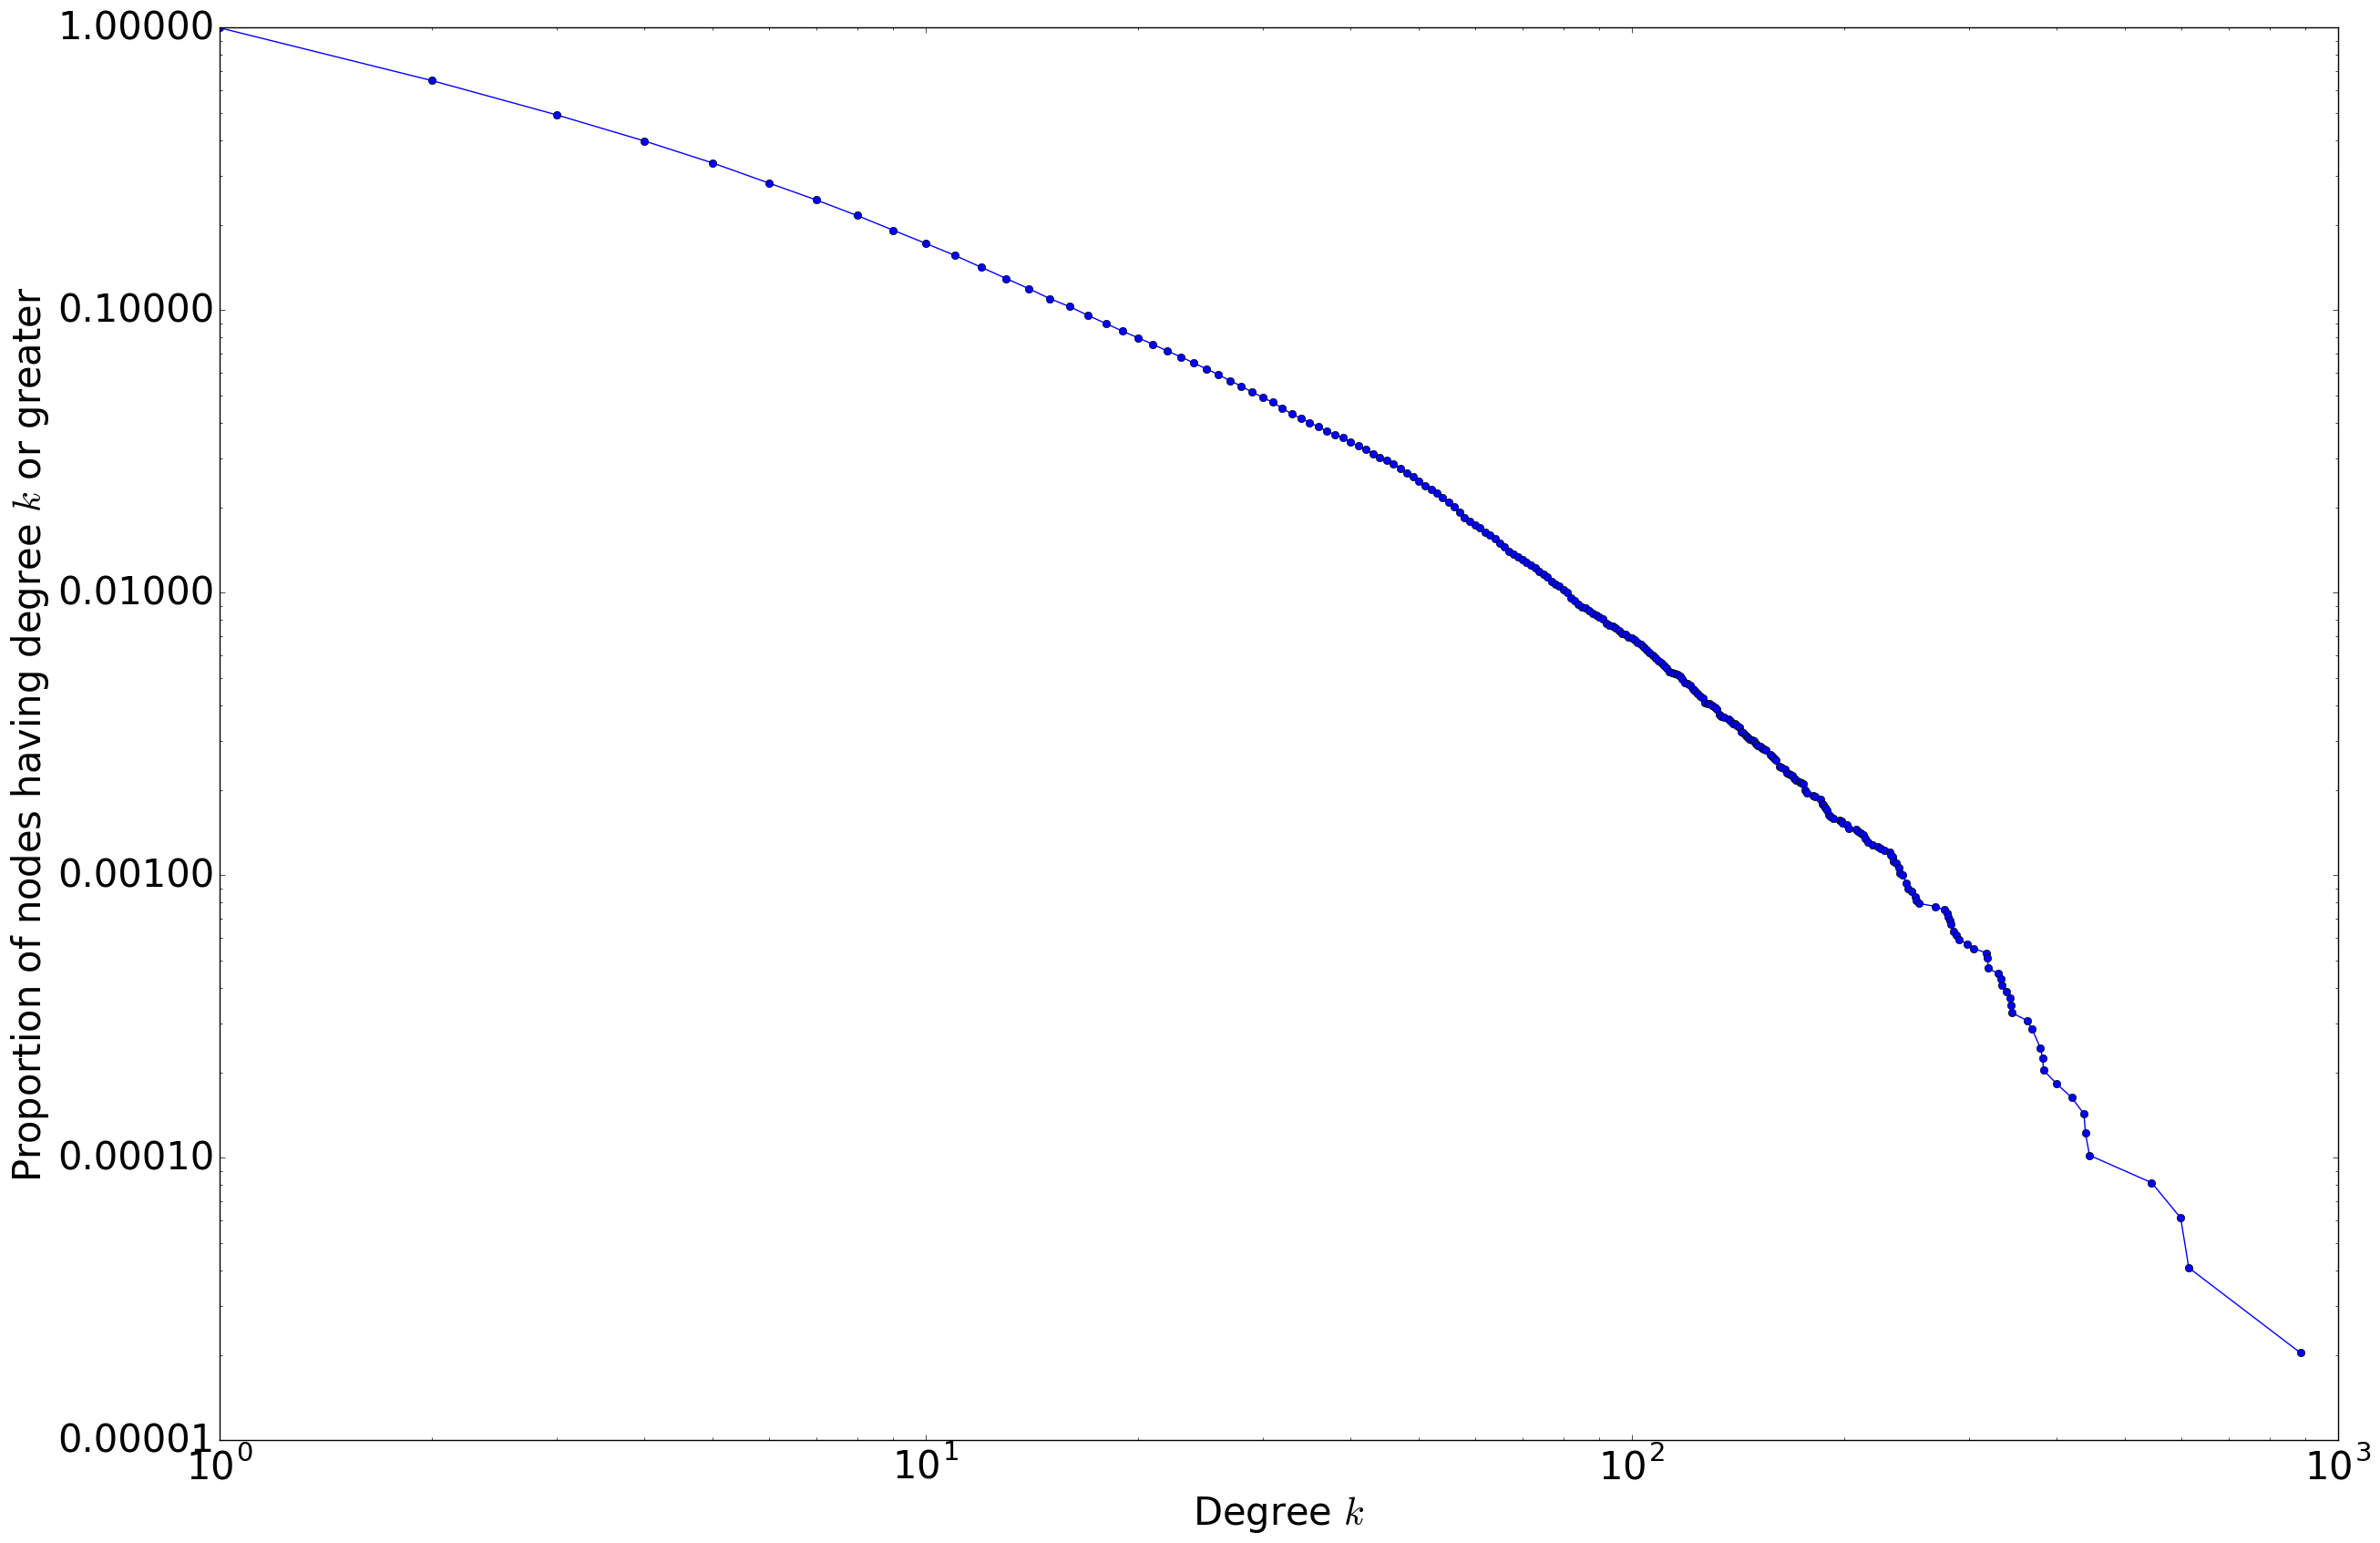

In [10]:
fig, ax = plt.subplots(1,1)
ax.loglog(xlist, ylist,'b-',marker='o')
#plt.title("Cumulative degree distribution")
ax.set_ylabel("Proportion of nodes having degree $k$ or greater")
ax.set_xlabel("Degree $k$")
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))
#plt.savefig('fig/wot_degree_distribution_prop_cml.eps')
plt.show()


# Finding scaling exponent

slope=-1.921421, std error=0.034624


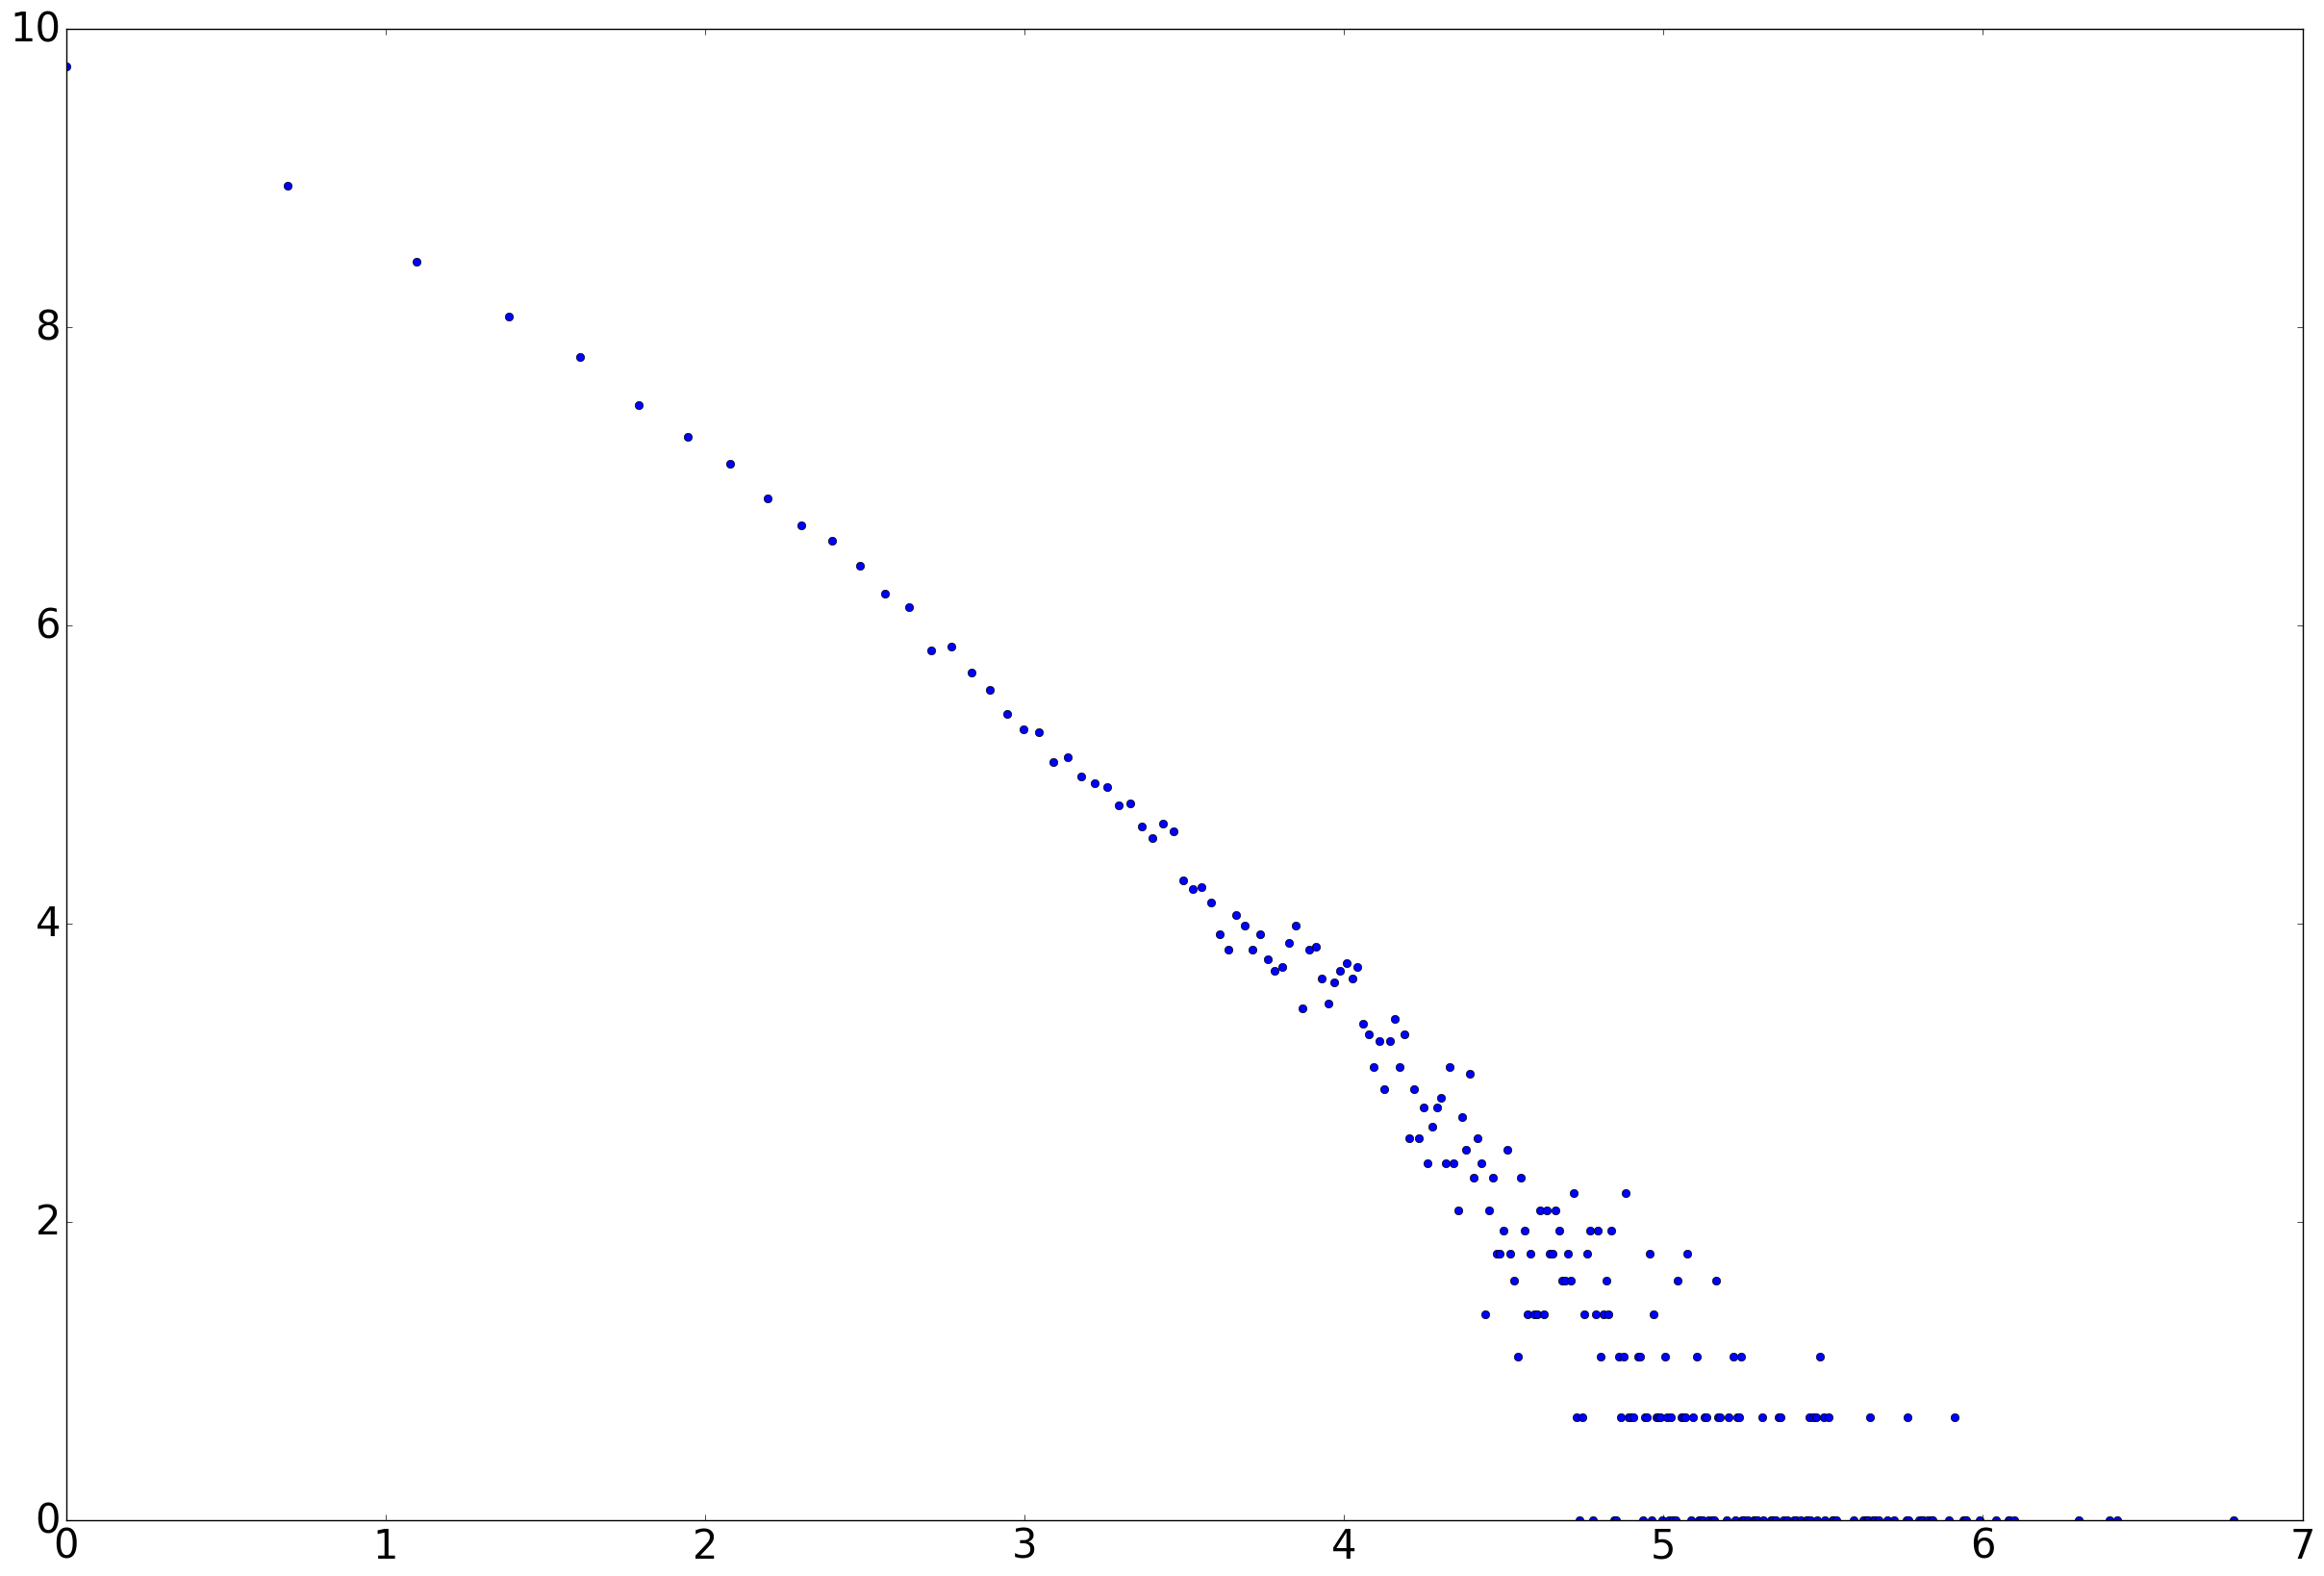

In [41]:
degree = list(hist.keys())
numof = list(hist.values())
pow_deg = np.log(degree)
pow_numof = np.log(numof)
from scipy import stats
a, b, r_value, p_value, std_err = stats.linregress(pow_deg,pow_numof)
print("slope=%f, std error=%f" % (a, std_err))
plt.plot(pow_deg, pow_numof, 'bo')
plt.show()